<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: pandas and matplotlib practice with IMDb Data

---

For this unit project, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with `pandas`.

The notebook is split into basic, intermediate, and advanced sections.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [5]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Shortest Film
movies[movies.index == movies.sort_values('duration').index[0]]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [7]:
# Longest Film
movies[movies.index == movies.sort_values('duration').index[-1]]

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

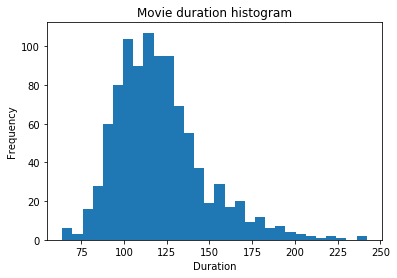

In [8]:
plt.hist(movies['duration'],bins=30)
plt.title('Movie duration histogram')
plt.ylabel('Frequency'); plt.xlabel('Duration');


#### Use a box plot to display that same data.

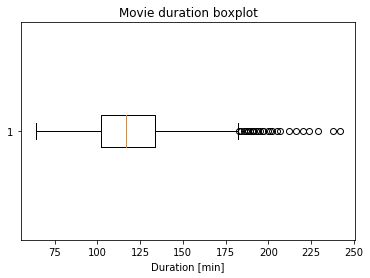

In [9]:
plt.boxplot(movies['duration'], vert=False)
plt.title('Movie duration boxplot')
plt.xlabel('Duration [min]');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualisation to display that same data, including a title and axis labels.

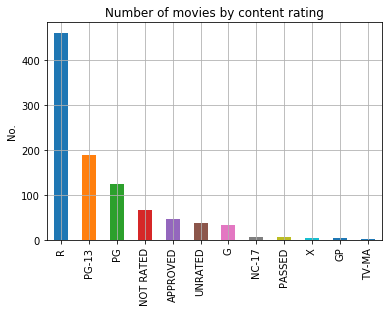

In [11]:
movies_by_content_rating = movies['content_rating'].value_counts()
movies_by_content_rating.plot(kind='bar', grid=True)
plt.title('Number of movies by content rating')
plt.ylabel('No.');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Set list of words which need to be replaced by 'UNRATED'
replace_list=['NOT RATED','APPROVED','PASSED','GP']

# Use a for loop to find words to be replaced by 'UNRATED'. Use .loc on movies DF to find these words. 
for word in replace_list:
    movies.loc[movies['content_rating'] == word,'content_rating'] = 'UNRATED'

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# As above, run another replace loop (but with different string values and outcome)
replace_list=['X','TV-MA']
for word in replace_list:
    movies.loc[movies['content_rating'] == word,'content_rating'] = 'NC-17'

#### Count the number of missing values in each column.

In [14]:
# Check whether any dat fields are blank
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# (First look at what the values are), then use .loc to selected and replace those values
movies.loc[movies["content_rating"].isnull(),'content_rating'] = 'UNRATED'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Create a new column 'over2h' in movies DF, that records the output of running an anonymous function on the duration column
movies['over2h'] = movies['duration'].apply(lambda duration: duration > 120)

# Use the split-combine-apply method by first splitting by 'if-over-2h', then combining by 'star-rating', and applying by .mean()
movies.groupby('over2h')['star_rating'].mean()

over2h
False    7.83849
True     7.95367
Name: star_rating, dtype: float64

#### Use a visualisation to detect whether there is a relationship between duration and star rating.

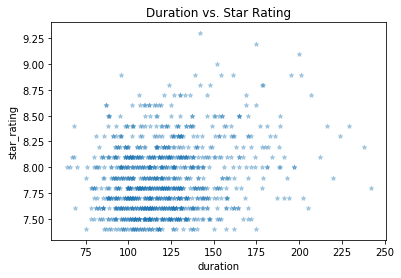

In [17]:
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.3, marker='*')
plt.title('Duration vs. Star Rating');

#### Calculate the average duration for each genre.

In [18]:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualise the relationship between content rating and duration.

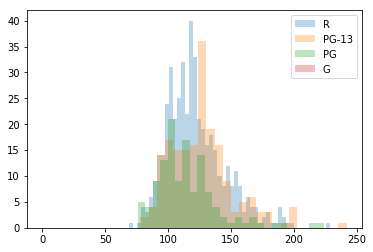

In [19]:
# Create 4 seperate series for each of the durations of the four main movie categories (excluding unrated, NC17)
R_duration = movies.loc[movies['content_rating']=='R','duration']
PG13_duration = movies.loc[movies['content_rating']=='PG-13','duration']
PG_duration = movies.loc[movies['content_rating']=='PG','duration']
G_duration = movies.loc[movies['content_rating']=='G-13','duration']

# Plot histograms for each movie category
plt.hist(R_duration, bins=50, alpha=0.3, label='R')
plt.hist(PG13_duration, bins=25, alpha=0.3, label='PG-13')
plt.hist(PG_duration, bins=25, alpha=0.3, label='PG')
plt.hist(G_duration, bins=25, alpha=0.3, label='G')
plt.legend(loc='upper right');

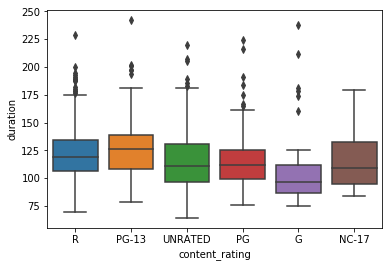

In [20]:
import seaborn as sns

# OPTION 1
#sns.stripplot(x="content_rating", y="duration", data=movies, jitter=True);

# OPTION 2
# sns.swarmplot(x="content_rating", y="duration", data=movies)

# OPTION 3
sns.boxplot(x="content_rating", y="duration", data=movies);

#### Determine the top rated movie (by star rating) for each genre.

In [21]:
movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Note as .duplicated function only shows the first of each duplicate, I have output those values to a variable
duplicated_titles = movies[movies['title'].duplicated()]['title']

# Then I have searched for those values in the movies DF to show all records
movies[movies['title'].isin(duplicated_titles)]

,star_rating,title,content_rating,genre,duration,actors_list,over2h
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",True
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",True
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",False
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",True
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",False
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",True
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",True
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",True


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Manually create the list of genres - as seen by doing movies['genre'].value_counts()
genres_selected = [
    'Drama',
    'Comedy',
    'Action',
    'Crime',
    'Biography',
    'Adventure',
    'Animation',
    'Horror',
    'Mystery',
    ]

# Filter the movies DF with .isin and the manual list of genres
movies_filtered_genre = movies[movies['genre'].isin(genres_selected)]

# Calculate average star rating per genre
movies_filtered_genre.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [24]:
# Use value counts to create a list of genres and counts
movies_by_genre = movies['genre'].value_counts()
movies_by_genre

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [25]:
# Use where method with anonymous function to remove any value_counts not greater than 10
genres_selected = movies_by_genre.where(lambda x : x>10).dropna()

# Filter the movies DF with .isin and the automatically selected genres list (note, .index is required to get a list from series)
movies_filtered_genre = movies[movies['genre'].isin(genres_selected.index)]

# Calculate average star rating per genre
movies_filtered_genre.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [26]:
# Create a series of genres and average star ratings
genre_scores = movies.groupby('genre')['star_rating'].mean()

#Filter the genre_scores list, based on whether the genre is in the genres_selected series. NOTE: genre_scores also needs to reference .index
genre_scores[genre_scores.index.isin(genres_selected.index)]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [27]:
# Group the movies DF by genre, then calculate count and mean of the star_rating column
movies_option4 = movies.groupby('genre')['star_rating'].agg(['count','mean'])

# Filter the count column by >10, output mean
movies_option4[movies_option4['count'] > 10]['mean']


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: mean, dtype: float64

## Bonus

#### If you were to make a recommendation to a film studio about a new movie they're working on:

- who would you recommend casting?
- what content rating, genre, and duration would you recommend they target?

In [28]:
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list,over2h
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",True
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",True


In [29]:
# Create a function that chops the [ and ] string characters off the data in the actors_list column
def str_corrector(row):
    row = row[1:len(row)-1]
    return row

In [30]:
# Run the str_corrector function on the actors_list column and output the result to a new cleaned column
movies['actors_list_clean'] = movies['actors_list'].apply(str_corrector)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,over2h,actors_list_clean
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",True,"u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton'"
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",True,"u'Marlon Brando', u'Al Pacino', u'James Caan'"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",True,"u'Al Pacino', u'Robert De Niro', u'Robert Duvall'"
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",True,"u'Christian Bale', u'Heath Ledger', u'Aaron Ec..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",True,"u'John Travolta', u'Uma Thurman', u'Samuel L. ..."


In [31]:
# Split the data in the actors_list_clean column into multiple columns
df = movies.join(movies['actors_list_clean'].str.split(',', expand=True).add_prefix('actor_'))
df = df.loc[:,['star_rating','actor_0','actor_1','actor_2']]
df.head()

,star_rating,actor_0,actor_1,actor_2
0,9.3,u'Tim Robbins',u'Morgan Freeman',u'Bob Gunton'
1,9.2,u'Marlon Brando',u'Al Pacino',u'James Caan'
2,9.1,u'Al Pacino',u'Robert De Niro',u'Robert Duvall'
3,9.0,u'Christian Bale',u'Heath Ledger',u'Aaron Eckhart'
4,8.9,u'John Travolta',u'Uma Thurman',u'Samuel L. Jackson'


In [32]:
# Concatenate the three actor columns into a single column
df0 = df[['star_rating','actor_0']]
df1 = df[['star_rating','actor_1']]
df2 = df[['star_rating','actor_2']]

all_dfs = [df0,df1,df2]

for df in all_dfs:
    df.columns = ['star_rating', 'actor']

In [41]:
dfs = pd.concat(all_dfs).reset_index(drop=True)
dfs

,star_rating,actor
0,9.3,u'Tim Robbins'
1,9.2,u'Marlon Brando'
2,9.1,u'Al Pacino'
3,9.0,u'Christian Bale'
4,8.9,u'John Travolta'
5,8.9,u'Henry Fonda'
6,8.9,u'Clint Eastwood'
7,8.9,u'Elijah Wood'
8,8.9,u'Liam Neeson'
9,8.9,u'Brad Pitt'


In [43]:
dfs.groupby('actor')['star_rating'].mean().duplicated()

actor
 u"Beverly D'Angelo"                   False
 u"Catherine O'Hara"                   False
 u"Chris O'Donnell"                    False
 u"Chris O'Dowd"                       False
 u"Dan O'Herlihy"                       True
 u"Donald O'Connor"                    False
 u"Heather O'Rourke"                   False
 u"Judith O'Dea"                        True
 u"Maureen O'Hara"                     False
 u"Peter O'Toole"                      False
 u"Ryan O'Neal"                         True
 u"Shin'ichi Himori"                   False
 u"Vincent D'Onofrio"                   True
 u'Aamir Khan'                         False
 u'Aaron Eckhart'                      False
 u'Abbie Cornish'                       True
 u'Abigail Breslin'                     True
 u'Ad\xe8le Exarchopoulos'              True
 u'Adam Bryant'                        False
 u'Adam Driver'                         True
 u'Adam Levine'                         True
 u'Adel Bencherif'                      True
 u'A